In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
import graphviz
from sklearn.tree import export_graphviz, DecisionTreeClassifier,plot_tree
from os.path import exists
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

In [2]:
try:
    data = pd.read_csv('SCDB_2023_01_justiceCentered_Citation/SCDB_2023_01_justiceCentered_Citation.csv',encoding='ISO-8859-1')
    data.head()
except:
    print('File not found')

C:\Users\hvurq\AppData\Local\Temp\ipykernel_15576\2519537659.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('SCDB_2023_01_justiceCentered_Citation/SCDB_2023_01_justiceCentered_Citation.csv',encoding='ISO-8859-1')


In [3]:
data[99:108][:]

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
99,1946-012,1946-012-01,1946-012-01-01,1946-012-01-01-01-01,12/9/1946,1,329 U.S. 187,67 S. Ct. 261,91 L. Ed. 181,1946 U.S. LEXIS 1658,...,6,3,86,HHBurton,2.0,2.0,1.0,1.0,80.0,NaN
100,1946-012,1946-012-01,1946-012-01-01,1946-012-01-01-01-02,12/9/1946,1,329 U.S. 187,67 S. Ct. 261,91 L. Ed. 181,1946 U.S. LEXIS 1658,...,6,3,84,RHJackson,4.0,2.0,2.0,2.0,80.0,86.0
101,1946-012,1946-012-01,1946-012-01-01,1946-012-01-01-01-03,12/9/1946,1,329 U.S. 187,67 S. Ct. 261,91 L. Ed. 181,1946 U.S. LEXIS 1658,...,6,3,81,WODouglas,1.0,2.0,2.0,2.0,NaN,NaN
102,1946-012,1946-012-01,1946-012-01-01,1946-012-01-01-01-04,12/9/1946,1,329 U.S. 187,67 S. Ct. 261,91 L. Ed. 181,1946 U.S. LEXIS 1658,...,6,3,80,FFrankfurter,2.0,2.0,1.0,1.0,86.0,NaN
103,1946-012,1946-012-01,1946-012-01-01,1946-012-01-01-01-05,12/9/1946,1,329 U.S. 187,67 S. Ct. 261,91 L. Ed. 181,1946 U.S. LEXIS 1658,...,6,3,79,SFReed,1.0,1.0,2.0,2.0,NaN,NaN
104,1946-012,1946-012-01,1946-012-01-01,1946-012-01-01-01-06,12/9/1946,1,329 U.S. 187,67 S. Ct. 261,91 L. Ed. 181,1946 U.S. LEXIS 1658,...,6,3,78,HLBlack,1.0,1.0,2.0,2.0,NaN,NaN
105,1946-012,1946-012-01,1946-012-01-01,1946-012-01-01-01-07,12/9/1946,1,329 U.S. 187,67 S. Ct. 261,91 L. Ed. 181,1946 U.S. LEXIS 1658,...,6,3,85,WBRutledge,1.0,1.0,2.0,2.0,NaN,NaN
106,1946-012,1946-012-01,1946-012-01-01,1946-012-01-01-01-08,12/9/1946,1,329 U.S. 187,67 S. Ct. 261,91 L. Ed. 181,1946 U.S. LEXIS 1658,...,6,3,82,FMurphy,1.0,1.0,2.0,2.0,NaN,NaN
107,1946-012,1946-012-01,1946-012-01-01,1946-012-01-01-01-09,12/9/1946,1,329 U.S. 187,67 S. Ct. 261,91 L. Ed. 181,1946 U.S. LEXIS 1658,...,6,3,87,FMVinson,2.0,1.0,1.0,1.0,80.0,86.0


In [4]:
base = data[['voteId','issueArea','petitionerState','respondentState','jurisdiction','caseOriginState','caseSourceState','certReason','lcDisposition','decisionDirection']]
len(base.voteId)

82537

In [5]:
if exists('data_for_naive_bayes2.csv'):
    base = pd.read_csv('data_for_naive_bayes2.csv',sep=';')
else:
    for counter in range(0,len(base.voteId)):
        string_ = base.voteId[counter]
        base.voteId[counter] = string_[-2:]
base.voteId

0        1
1        2
2        3
3        4
4        5
        ..
82532    5
82533    6
82534    7
82535    8
82536    9
Name: voteId, Length: 82537, dtype: int64

In [6]:
if not exists('data_for_naive_bayes2.csv'):
    base.to_csv('data_for_naive_bayes2.csv',sep=';',index=False)

In [7]:
tmp = base[(base.petitionerState.isna()==False)]
tmp = tmp[(base.respondentState.isna()==False)]
tmp = tmp[(base.jurisdiction.isna()==False)]
tmp = tmp[(base.caseOriginState.isna()==False)]
tmp = tmp[(base.caseSourceState.isna()==False)]
tmp = tmp[(base.issueArea.isna()==False)]
tmp = tmp[(base.decisionDirection.isna()==False)]
tmp = tmp[(base.certReason.isna()==False)]
tmp = tmp[(base.lcDisposition.isna()==False)]
tmp = tmp[(base.decisionDirection!=3)]
#tmp = copy(base)
#tmp = tmp.fillna(0)
tmp

C:\Users\hvurq\AppData\Local\Temp\ipykernel_15576\691944102.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp[(base.respondentState.isna()==False)]
C:\Users\hvurq\AppData\Local\Temp\ipykernel_15576\691944102.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp[(base.jurisdiction.isna()==False)]
C:\Users\hvurq\AppData\Local\Temp\ipykernel_15576\691944102.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp[(base.caseOriginState.isna()==False)]
C:\Users\hvurq\AppData\Local\Temp\ipykernel_15576\691944102.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp[(base.caseSourceState.isna()==False)]
C:\Users\hvurq\AppData\Local\Temp\ipykernel_15576\691944102.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp[(base.issueArea.isna()==False)]
C:\Users\hvurq\AppData\Local\Temp\ipykernel_15576

,voteId,issueArea,petitionerState,respondentState,jurisdiction,caseOriginState,caseSourceState,certReason,lcDisposition,decisionDirection
243,1,8.0,41.0,41.0,2.0,41.0,41.0,1.0,2.0,2.0
244,2,8.0,41.0,41.0,2.0,41.0,41.0,1.0,2.0,2.0
245,3,8.0,41.0,41.0,2.0,41.0,41.0,1.0,2.0,2.0
246,4,8.0,41.0,41.0,2.0,41.0,41.0,1.0,2.0,2.0
247,5,8.0,41.0,41.0,2.0,41.0,41.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
74763,5,3.0,33.0,33.0,1.0,33.0,33.0,12.0,3.0,1.0
74764,6,3.0,33.0,33.0,1.0,33.0,33.0,12.0,3.0,1.0
74765,7,3.0,33.0,33.0,1.0,33.0,33.0,12.0,3.0,1.0
74766,8,3.0,33.0,33.0,1.0,33.0,33.0,12.0,3.0,1.0


In [8]:
previsors = tmp.iloc[:,0:9].values
toPredict = tmp.iloc[:,9].values
previsors

array([[ 1.,  8., 41., ..., 41.,  1.,  2.],
       [ 2.,  8., 41., ..., 41.,  1.,  2.],
       [ 3.,  8., 41., ..., 41.,  1.,  2.],
       ...,
       [ 7.,  3., 33., ..., 33., 12.,  3.],
       [ 8.,  3., 33., ..., 33., 12.,  3.],
       [ 9.,  3., 33., ..., 33., 12.,  3.]])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(previsors,toPredict,test_size=0.3,random_state=1)

In [76]:
#Object SVC created
tree_model_svc = SVC()
#Object DecisionTreeClassifier created
tree_model_tree = DecisionTreeClassifier(max_depth=6)
#training the models
tree_model_svc.fit(X_train,y_train)
tree_model_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [77]:
#Results SVC model
y_predicted_svc = tree_model_svc.predict(X_test)
confusion = confusion_matrix(y_test,y_predicted_svc)
print("Confusion matrix is: ")
print(confusion)
accuracy = accuracy_score(y_test,y_predicted_svc)
print("Accuracy in SVC model was:")
print(accuracy)

Confusion matrix is: 
[[60 56]
 [39 80]]
Accuracy in SVC model was:
0.5957446808510638


In [78]:
#Results tree model
y_predicted_tree = tree_model_tree.predict(X_test)
confusion_tree = confusion_matrix(y_test,y_predicted_tree)
print("Confusion matrix in tree model is: ")
print(confusion_tree)
accuracy = accuracy_score(y_test,y_predicted_tree)
print("")
print("Accuracy in tree model was:")
print(f"{accuracy*100:.1f}%")

Confusion matrix in tree model is: 
[[ 96  20]
 [ 16 103]]

Accuracy in tree model was:
84.7%


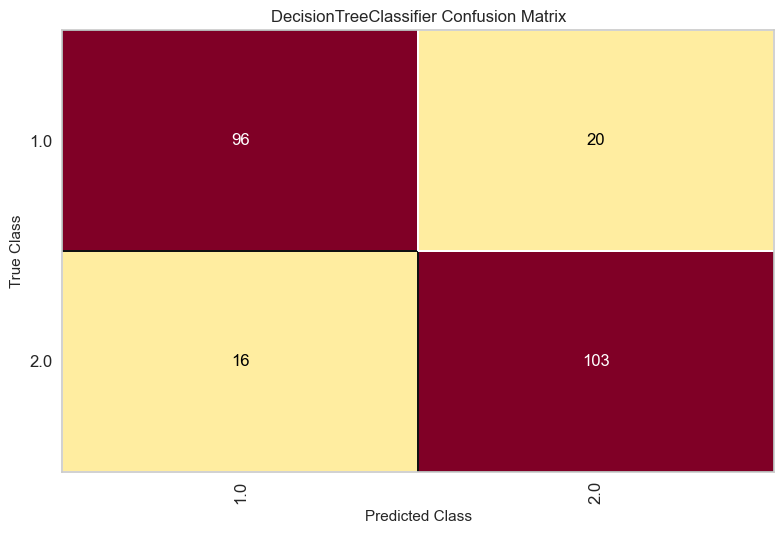

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [79]:
#Visualizando a matriz de confusão
visual_matrix = ConfusionMatrix(DecisionTreeClassifier(max_depth=6))
visual_matrix.fit(X_train,y_train)
visual_matrix.score(X_test,y_test)
visual_matrix.poof()

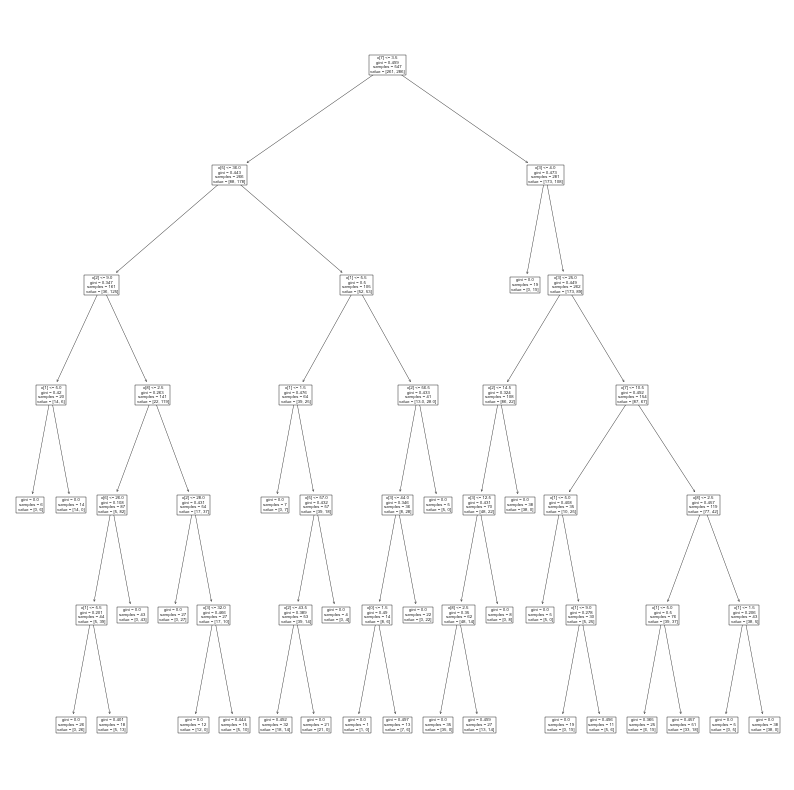

In [80]:
plt.figure(figsize=(10,10))
plot_tree(tree_model_tree)
plt.savefig("output_tree.pdf")
plt.show()